In [174]:
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [251]:
dataa = pd.read_csv("customer_support_tickets.csv")

In [175]:
data = pd.read_csv("customer_support_tickets.csv")

In [176]:
data

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [177]:
data["Product Purchased"].unique()

array(['GoPro Hero', 'LG Smart TV', 'Dell XPS', 'Microsoft Office',
       'Autodesk AutoCAD', 'Microsoft Surface', 'Philips Hue Lights',
       'Fitbit Versa Smartwatch', 'Dyson Vacuum Cleaner',
       'Nintendo Switch', 'Microsoft Xbox Controller',
       'Nintendo Switch Pro Controller', 'Nest Thermostat',
       'Sony PlayStation', 'GoPro Action Camera', 'Xbox',
       'LG Washing Machine', 'Canon EOS', 'HP Pavilion', 'Amazon Kindle',
       'Lenovo ThinkPad', 'Fitbit Charge', 'Adobe Photoshop',
       'Google Pixel', 'Amazon Echo', 'PlayStation', 'Samsung Galaxy',
       'iPhone', 'LG OLED', 'Sony Xperia', 'Apple AirPods',
       'Sony 4K HDR TV', 'Canon DSLR Camera', 'Roomba Robot Vacuum',
       'Nikon D', 'Bose QuietComfort', 'Samsung Soundbar', 'Asus ROG',
       'Bose SoundLink Speaker', 'Google Nest', 'Garmin Forerunner',
       'MacBook Pro'], dtype=object)

In [178]:
data["Ticket Type"].unique()

array(['Technical issue', 'Billing inquiry', 'Cancellation request',
       'Product inquiry', 'Refund request'], dtype=object)

In [179]:
data["Customer Satisfaction Rating"].value_counts()

Customer Satisfaction Rating
3.0    580
1.0    553
2.0    549
5.0    544
4.0    543
Name: count, dtype: int64

In [180]:
data["Customer Satisfaction Rating"].unique()

array([nan,  3.,  1.,  4.,  5.,  2.])

In [181]:
# Drop non-relevant columns
data.drop(columns=['Ticket ID', 'Customer Name', 'Customer Email'], errors='ignore', inplace=True)

In [182]:
# Handle missing values
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna("Unknown", inplace=True)  # Fill categorical missing values

for col in data.select_dtypes(include=['number']).columns:
    data[col].fillna(0, inplace=True)  # Fill numerical missing values

In [183]:
#Checking for Null Values
data.isnull().sum()

Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64

In [184]:
data.head()

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Social media,2023-06-01 12:15:36,Unknown,0.0
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,Unknown,Critical,Chat,2023-06-01 16:45:38,Unknown,0.0
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [185]:
data["Customer Satisfaction Rating"].unique()

array([0., 3., 1., 4., 5., 2.])

In [186]:
data["Customer Satisfaction Rating"].value_counts()

Customer Satisfaction Rating
0.0    5700
3.0     580
1.0     553
2.0     549
5.0     544
4.0     543
Name: count, dtype: int64

In [253]:
dfv = dataa.copy()

In [255]:
dfv

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


### Data visualization

Top 10 Common Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


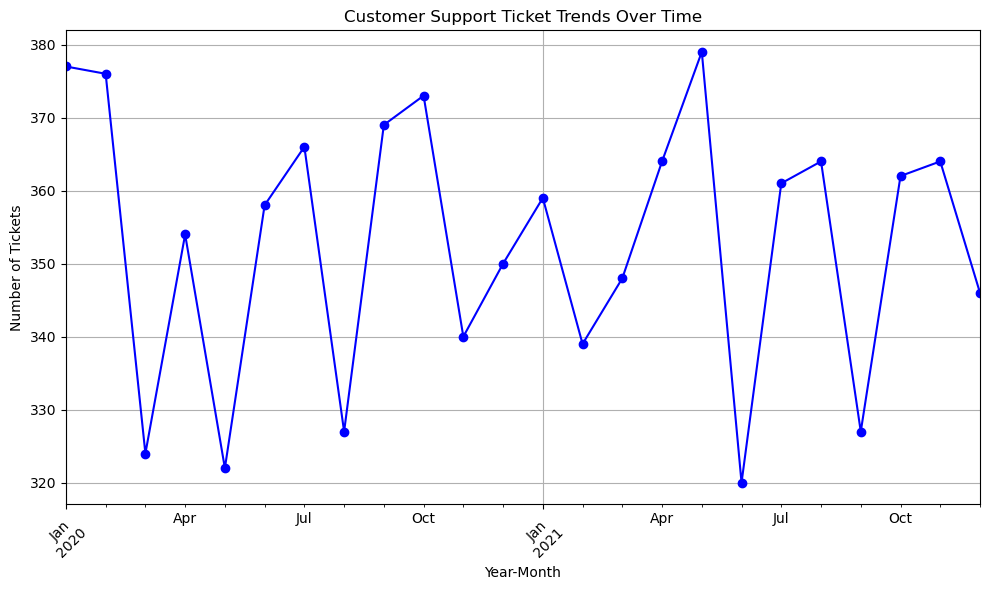

In [297]:
#Analyze customer support ticket trends
# Identify common issues
common_issues = dfv['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)
# Plotting ticket trends over time
dfv['Date of Purchase'] = pd.to_datetime(dfv['Date of Purchase'])
dfv['YearMonth'] = dfv['Date of Purchase'].dt.to_period('M')
ticket_trends = dfv.groupby('YearMonth').size()
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o',color = "blue")
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


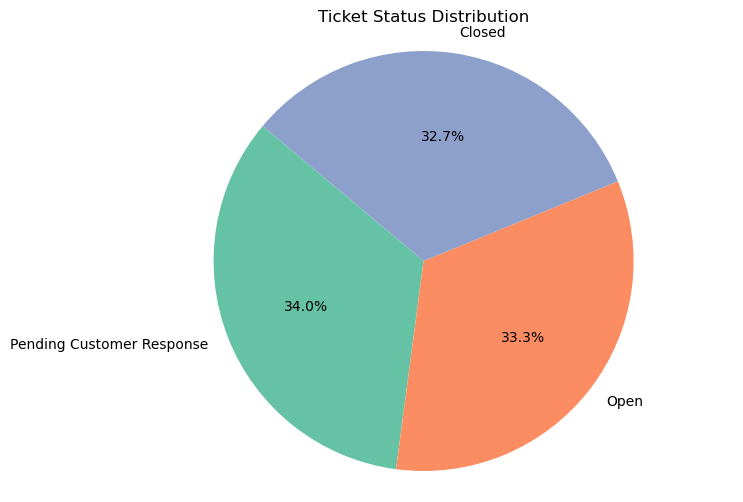

In [295]:
#Ticket Status Distribution
ticket_status_distribution = dfv['Ticket Status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(ticket_status_distribution,
labels=ticket_status_distribution.index, autopct='%1.1f%%',
colors=sns.color_palette("Set2"), startangle=140)
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

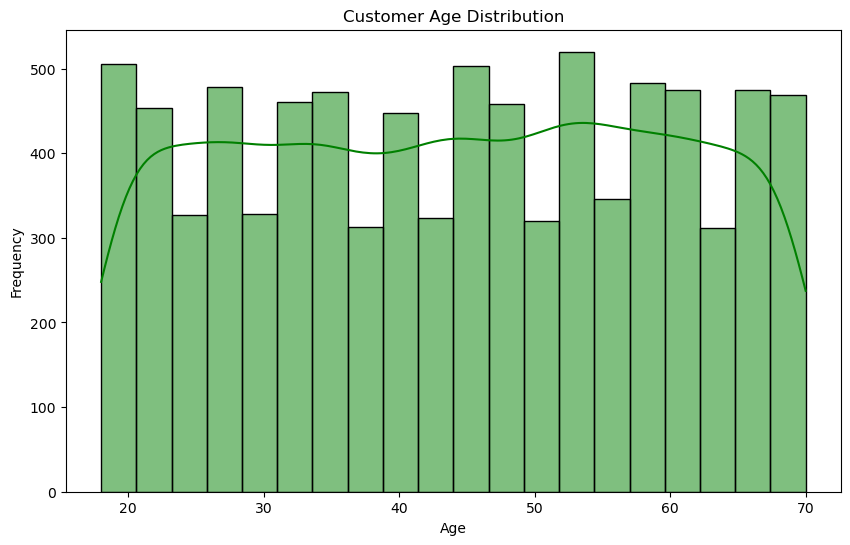

In [307]:
#Customer Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(dfv['Customer Age'], bins=20, kde=True,color='Green')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


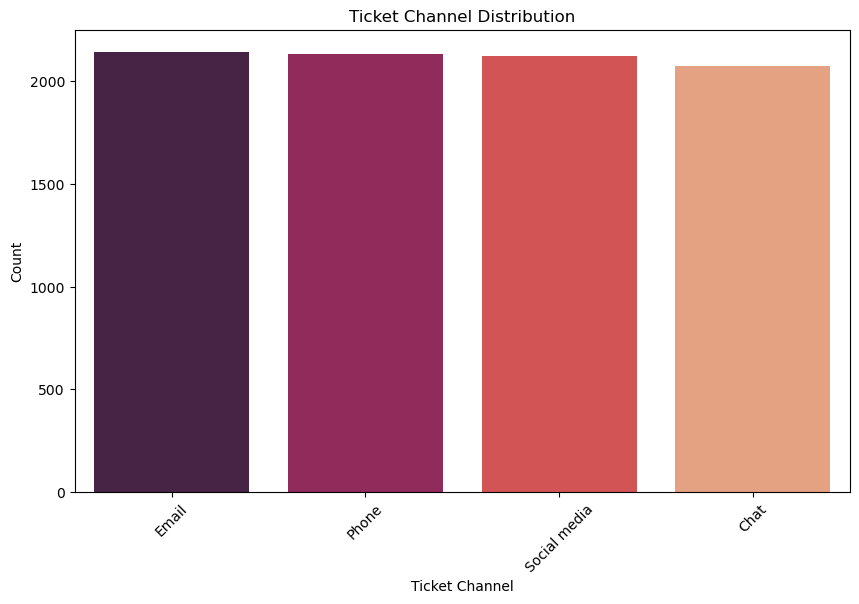

In [277]:
#Ticket Channel Distribution
plt.figure(figsize=(10, 6))
ticket_channel_distribution = dfv['Ticket Channel'].value_counts()
sns.barplot(x=ticket_channel_distribution.index,
y=ticket_channel_distribution, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


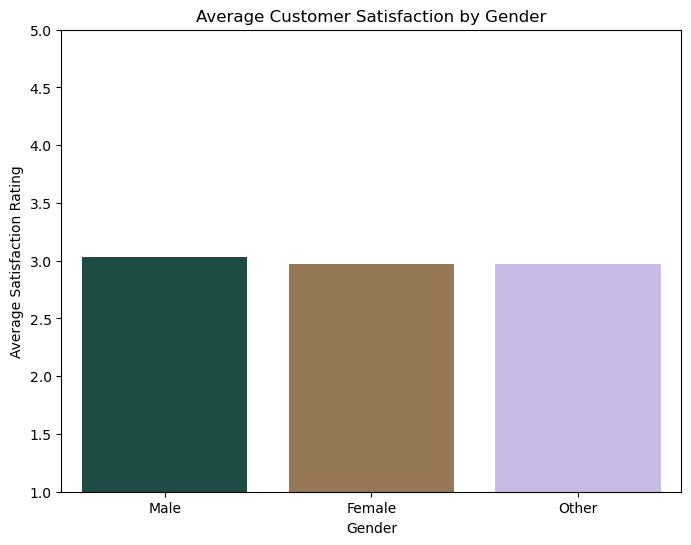

In [313]:
#Average Customer Satisfaction by Gender (Bar Plot)
average_satisfaction = dfv.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='cubehelix', order=['Male', 'Female', 'Other'])
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 5) 
plt.show()

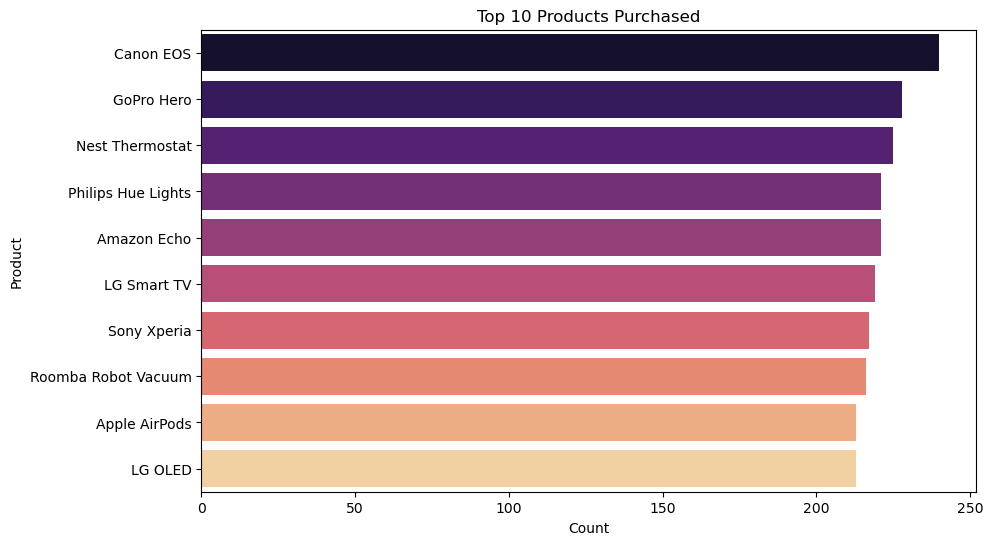

In [283]:
#Product Purchased Distribution
plt.figure(figsize=(10, 6))
product_purchased_distribution = dfv['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index,
x=product_purchased_distribution, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()


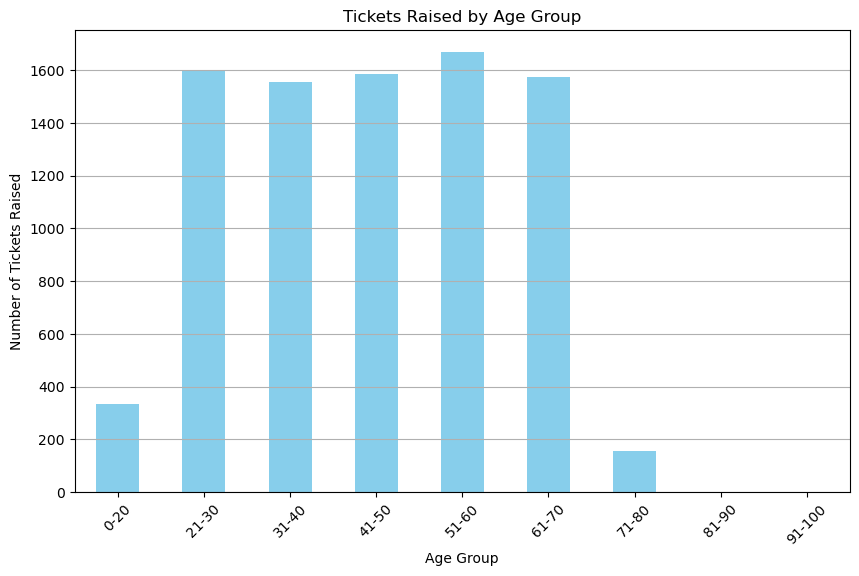

In [315]:
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70','71-80', '81-90', '91-100']
# Categorize customers into age groups
dfv['Age Group'] = pd.cut(dfv['Customer Age'], bins=bins,
labels=labels, right=False)
# Calculate number of tickets raised by each age group
tickets_by_age_group = dfv.groupby('Age Group').size()
# Plot
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [187]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [188]:
colname=[]
for column in data.columns:
    if data[column].dtype == "object":
        colname.append(column)
colname

['Customer Gender',
 'Product Purchased',
 'Date of Purchase',
 'Ticket Type',
 'Ticket Subject',
 'Ticket Description',
 'Ticket Status',
 'Resolution',
 'Ticket Priority',
 'Ticket Channel',
 'First Response Time',
 'Time to Resolution']

In [189]:
for column in colname:
    data[column]=le.fit_transform(data[column])
    le_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print("Features,column")
    print("Mapping",le_mapping)




Features,column
Mapping {'Female': 0, 'Male': 1, 'Other': 2}
Features,column
Mapping {'Adobe Photoshop': 0, 'Amazon Echo': 1, 'Amazon Kindle': 2, 'Apple AirPods': 3, 'Asus ROG': 4, 'Autodesk AutoCAD': 5, 'Bose QuietComfort': 6, 'Bose SoundLink Speaker': 7, 'Canon DSLR Camera': 8, 'Canon EOS': 9, 'Dell XPS': 10, 'Dyson Vacuum Cleaner': 11, 'Fitbit Charge': 12, 'Fitbit Versa Smartwatch': 13, 'Garmin Forerunner': 14, 'GoPro Action Camera': 15, 'GoPro Hero': 16, 'Google Nest': 17, 'Google Pixel': 18, 'HP Pavilion': 19, 'LG OLED': 20, 'LG Smart TV': 21, 'LG Washing Machine': 22, 'Lenovo ThinkPad': 23, 'MacBook Pro': 24, 'Microsoft Office': 25, 'Microsoft Surface': 26, 'Microsoft Xbox Controller': 27, 'Nest Thermostat': 28, 'Nikon D': 29, 'Nintendo Switch': 30, 'Nintendo Switch Pro Controller': 31, 'Philips Hue Lights': 32, 'PlayStation': 33, 'Roomba Robot Vacuum': 34, 'Samsung Galaxy': 35, 'Samsung Soundbar': 36, 'Sony 4K HDR TV': 37, 'Sony PlayStation': 38, 'Sony Xperia': 39, 'Xbox': 40, '

In [190]:
data

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,32,2,16,446,4,13,3369,2,2573,0,3,2923,2728,0.0
1,42,0,21,507,4,10,2004,2,2573,0,0,3915,2728,0.0
2,48,2,10,195,4,8,189,0,343,2,3,2684,2153,3.0
3,27,0,25,317,0,0,1971,0,2549,2,3,1859,293,3.0
4,67,0,5,34,0,3,636,0,2658,2,1,208,2356,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,22,0,20,707,2,7,7399,1,2573,2,2,5470,2728,0.0
8465,27,0,7,52,4,14,660,1,2573,0,1,5470,2728,0.0
8466,57,0,15,594,4,0,5687,0,666,1,3,2336,580,3.0
8467,54,1,33,654,2,9,4274,0,2645,3,1,4295,682,3.0


In [191]:
#Splitting the data in x and y
x = data.drop(columns = "Customer Satisfaction Rating",axis=1)
y = data["Customer Satisfaction Rating"]
# x= data.values[:,-3:-1]
# y= data.values[:,-1]



In [192]:
#using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [193]:
print(x_train.shape)
print(x_test.shape)

(5928, 13)
(2541, 13)


In [194]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [195]:
#training the model using Random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=42)

In [196]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [197]:
y_pred = model.predict(x_test)
print(list(zip(y_test,y_pred)))

[(0.0, 0.0), (5.0, 3.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (2.0, 5.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (3.0, 2.0), (3.0, 1.0), (0.0, 0.0), (5.0, 5.0), (0.0, 0.0), (3.0, 3.0), (3.0, 3.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (3.0, 4.0), (5.0, 2.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (4.0, 4.0), (2.0, 5.0), (2.0, 3.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (3.0, 5.0), (0.0, 0.0), (2.0, 3.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (4.0, 5.0), (5.0, 3.0), (0.0, 0.0), (0.0, 0.0), (2.0, 5.0), (0.0, 0.0), (5.0, 4.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (3.0, 2.0), (0.0, 0.0), (2.0, 2.0), (1.0, 4.0), (0.0, 0.0), (1.0, 3.0), (3.0, 1.0), (1.0, 3.0), (0.0, 0.0), (1.0, 2.0), (0.0, 0.0), (3.0, 2.0), (0.0, 0.0), (4.0, 5.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (4.0, 4.0), (0.0, 0.0), (0.0, 0.0), (1.0, 4.0), (4.

In [198]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [199]:
cfm= confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification Report")
print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)
print("Accuracy of Model :",acc)

[[1720    0    0    0    0    0]
 [   0   30   27   39   36   25]
 [   0   38   38   34   26   26]
 [   0   38   35   46   30   21]
 [   0   28   37   31   32   27]
 [   0   41   31   45   36   24]]
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1720
         1.0       0.17      0.19      0.18       157
         2.0       0.23      0.23      0.23       162
         3.0       0.24      0.27      0.25       170
         4.0       0.20      0.21      0.20       155
         5.0       0.20      0.14      0.16       177

    accuracy                           0.74      2541
   macro avg       0.34      0.34      0.34      2541
weighted avg       0.74      0.74      0.74      2541

Accuracy of Model : 0.743801652892562


In [200]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(criterion="gini")
model_DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [201]:
y_pred = model.predict(x_test)
print(list(zip(y_test,y_pred)))

[(0.0, 0.0), (5.0, 3.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (2.0, 5.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (3.0, 2.0), (3.0, 1.0), (0.0, 0.0), (5.0, 5.0), (0.0, 0.0), (3.0, 3.0), (3.0, 3.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (3.0, 4.0), (5.0, 2.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (4.0, 4.0), (2.0, 5.0), (2.0, 3.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (3.0, 5.0), (0.0, 0.0), (2.0, 3.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (4.0, 5.0), (5.0, 3.0), (0.0, 0.0), (0.0, 0.0), (2.0, 5.0), (0.0, 0.0), (5.0, 4.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (3.0, 2.0), (0.0, 0.0), (2.0, 2.0), (1.0, 4.0), (0.0, 0.0), (1.0, 3.0), (3.0, 1.0), (1.0, 3.0), (0.0, 0.0), (1.0, 2.0), (0.0, 0.0), (3.0, 2.0), (0.0, 0.0), (4.0, 5.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (4.0, 4.0), (0.0, 0.0), (0.0, 0.0), (1.0, 4.0), (4.

In [202]:
cfm= confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification Report")
print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)
print("Accuracy of Model :",acc)

[[1720    0    0    0    0    0]
 [   0   30   27   39   36   25]
 [   0   38   38   34   26   26]
 [   0   38   35   46   30   21]
 [   0   28   37   31   32   27]
 [   0   41   31   45   36   24]]
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1720
         1.0       0.17      0.19      0.18       157
         2.0       0.23      0.23      0.23       162
         3.0       0.24      0.27      0.25       170
         4.0       0.20      0.21      0.20       155
         5.0       0.20      0.14      0.16       177

    accuracy                           0.74      2541
   macro avg       0.34      0.34      0.34      2541
weighted avg       0.74      0.74      0.74      2541

Accuracy of Model : 0.743801652892562


In [203]:
data

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,32,2,16,446,4,13,3369,2,2573,0,3,2923,2728,0.0
1,42,0,21,507,4,10,2004,2,2573,0,0,3915,2728,0.0
2,48,2,10,195,4,8,189,0,343,2,3,2684,2153,3.0
3,27,0,25,317,0,0,1971,0,2549,2,3,1859,293,3.0
4,67,0,5,34,0,3,636,0,2658,2,1,208,2356,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,22,0,20,707,2,7,7399,1,2573,2,2,5470,2728,0.0
8465,27,0,7,52,4,14,660,1,2573,0,1,5470,2728,0.0
8466,57,0,15,594,4,0,5687,0,666,1,3,2336,580,3.0
8467,54,1,33,654,2,9,4274,0,2645,3,1,4295,682,3.0


In [204]:
data["Customer Satisfaction Rating"].value_counts()

Customer Satisfaction Rating
0.0    5700
3.0     580
1.0     553
2.0     549
5.0     544
4.0     543
Name: count, dtype: int64

In [205]:
# #using cross validation
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()

# #performing kfold_cross_validation
# from sklearn.model_selection import KFold
# kfold_cv=KFold(n_splits=10,shuffle=True)
# #print(kfold_cv)


# from sklearn.model_selection import cross_val_score
# #running model using scoring metric as accuracy
# kfold_cv_result=cross_val_score(estimator=model,X=X_train,y=y_train,cv=kfold_cv)

# print(kfold_cv_result)
# #finding mean
# print(kfold_cv_result.mean())

# #for sake of evaluation the model is durable or not

### Clustering


In [207]:
df= pd.read_csv("customer_support_tickets.csv")

In [208]:
df

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [210]:
# Drop non-relevant columns
df.drop(columns=['Ticket ID', 'Customer Name', 'Customer Email'], errors='ignore', inplace=True)

In [211]:
# Handle missing values
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna("Unknown", inplace=True)  # Fill categorical missing values

for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)  # Fill numerical missing values

In [212]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [213]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.values[:,[11,12]])
# X_scaled = scaler.fit_transform(df.values[:,[8,12]])

In [214]:
df

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,32,2,16,446,4,13,3369,2,2573,0,3,2923,2728,3.0
1,42,0,21,507,4,10,2004,2,2573,0,0,3915,2728,3.0
2,48,2,10,195,4,8,189,0,343,2,3,2684,2153,3.0
3,27,0,25,317,0,0,1971,0,2549,2,3,1859,293,3.0
4,67,0,5,34,0,3,636,0,2658,2,1,208,2356,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,22,0,20,707,2,7,7399,1,2573,2,2,5470,2728,3.0
8465,27,0,7,52,4,14,660,1,2573,0,1,5470,2728,3.0
8466,57,0,15,594,4,0,5687,0,666,1,3,2336,580,3.0
8467,54,1,33,654,2,9,4274,0,2645,3,1,4295,682,3.0


[16937.999999999996, 8821.851515009326, 3598.7342719668204, 2678.367566982854, 1954.4279043819379, 1558.773775298289, 1342.022120683948, 1122.9967339698485, 927.8187539211001, 845.0425173723388]


Text(0, 0.5, 'wsse')

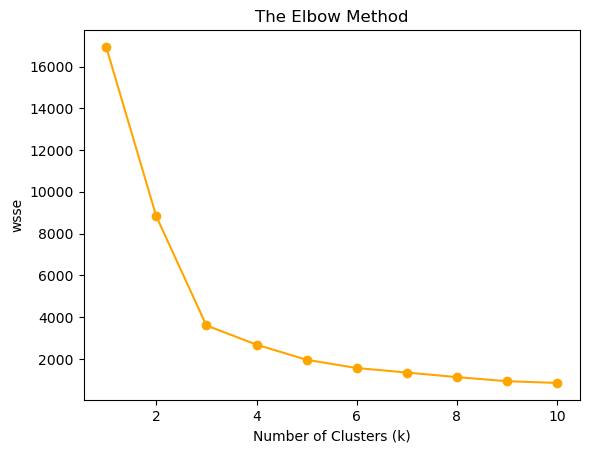

In [230]:
from sklearn.cluster import KMeans

wsse= []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i,random_state=10) 
    kmeans.fit(X_scaled)
    wsse.append(kmeans.inertia_) #wsse_ --> helps to find out squared sum error (wsse)
print(wsse)
plt.plot(range(1,11),wsse, marker='o',color="orange")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('wsse')

###  we are considering n_clusters as 5 because curve becomes stable 

In [232]:
kmeans = KMeans(n_clusters=5,random_state=10)
Y_pred = kmeans.fit_predict(X_scaled)

In [234]:
Y_pred

array([2, 2, 2, ..., 1, 3, 0])

In [236]:
df["clusters"] = Y_pred
df.head(10)

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,clusters
0,32,2,16,446,4,13,3369,2,2573,0,3,2923,2728,3.0,2
1,42,0,21,507,4,10,2004,2,2573,0,0,3915,2728,3.0,2
2,48,2,10,195,4,8,189,0,343,2,3,2684,2153,3.0,2
3,27,0,25,317,0,0,1971,0,2549,2,3,1859,293,3.0,1
4,67,0,5,34,0,3,636,0,2658,2,1,208,2356,1.0,4
5,53,1,25,209,1,9,343,1,2573,2,3,5470,2728,3.0,0
6,24,2,26,53,2,14,6242,1,2573,0,3,5470,2728,3.0,0
7,23,1,32,221,3,1,3835,1,2573,0,3,5470,2728,3.0,0
8,60,2,13,197,4,7,5251,2,2573,2,3,2525,2728,3.0,2
9,27,1,11,65,3,9,7442,2,2573,0,2,2280,2728,3.0,2


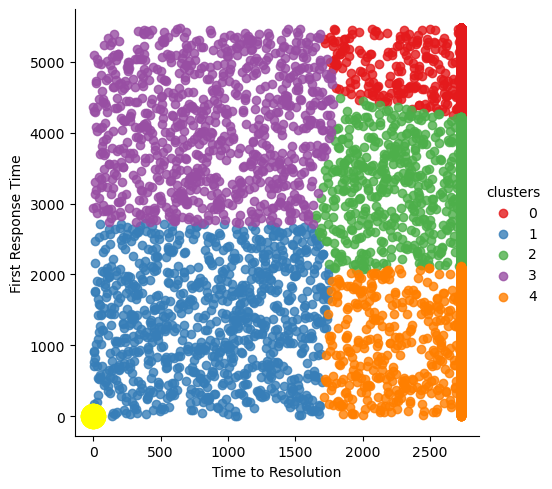

In [238]:
sns.lmplot(data=df, x=df.columns[-3], y=df.columns[-4], fit_reg=False, hue="clusters", palette="Set1")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,-1],s=300,c="yellow")
plt.show()